# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [7]:
cat=Table.read('./data/dmu26_XID+PACS_EGS_cat.fits')


In [8]:
cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J141320.446+512352.444,213.3351930857345,51.397901045990594,502.05533,849.1843,160.21616,508.9435,850.18335,159.50398,-0.0005647385,-0.0014535,0.0018984716,0.002757794,0.99838,0.99988234,2000.0,2000.0,0.0,0.0
HELP_J141320.617+512427.861,213.335904625746,51.4077392135701,511.5775,853.8872,168.34749,490.39423,840.6916,168.1204,-0.0005647385,-0.0014535,0.0018984716,0.002757794,0.99851435,0.99890053,2000.0,2000.0,0.0,0.0
HELP_J141320.891+512348.344,213.3370447157345,51.39676212599059,502.00378,849.8648,155.85968,501.6993,846.9761,165.49327,-0.0005647385,-0.0014535,0.0018984716,0.002757794,0.9992919,0.99851066,2000.0,2000.0,0.0,0.0
HELP_J141321.091+512351.815,213.3378810057345,51.39772633599059,495.16833,836.76404,157.35765,503.18497,824.13245,180.88087,-0.0005647385,-0.0014535,0.0018984716,0.002757794,0.99910295,0.99881184,2000.0,2000.0,0.0,0.0
HELP_J141321.871+512444.770,213.341128625746,51.4124362135701,117.732864,266.16177,30.863213,486.90387,833.8137,148.07913,-0.0005647385,-0.0014535,0.0018984716,0.002757794,0.99932086,0.99890816,2000.0,2000.0,0.0,0.0
HELP_J141322.252+512448.244,213.34271587573448,51.41340099599059,135.10527,305.52216,37.57485,521.3508,833.482,184.16472,-0.0005647385,-0.0014535,0.0018984716,0.002757794,0.9986603,0.9997671,2000.0,2000.0,0.0,0.0
HELP_J141322.563+512432.091,213.3440134757345,51.40891422599059,504.86853,842.66315,147.69443,482.0533,827.0907,168.4115,-0.0005647385,-0.0014535,0.0018984716,0.002757794,0.99853027,0.999043,2000.0,2000.0,0.0,0.0
HELP_J141322.934+512418.706,213.34555762574598,51.4051962135701,503.48804,846.1099,155.27347,489.42914,832.18915,155.13911,-0.0005647385,-0.0014535,0.0018984716,0.002757794,0.998795,0.9987433,2000.0,2000.0,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


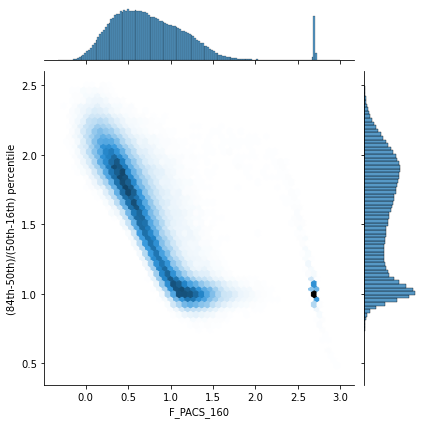

In [13]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 2.5 
n_use=skew> 2.5
g=sns.jointplot(x=np.log10(cat['F_PACS_160'][use]),y=skew[use], kind='hex')

g.savefig('../../data/figs/sk_PACS100_EGS.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS100_EGS.pdf', bbox='tight')

For 100 $\mathrm{\mu m}$ depth is ~ 10mJy

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


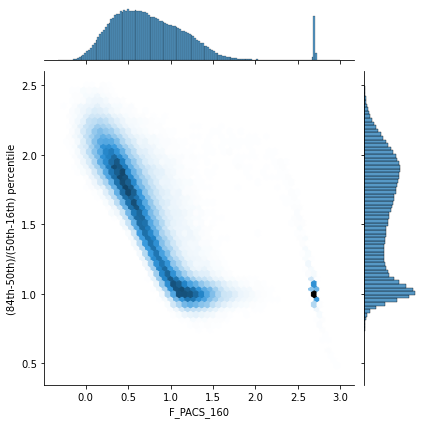

In [15]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 2.5
g=sns.jointplot(x=np.log10(cat['F_PACS_160'][use]),y=skew[use], kind='hex')

g.savefig('../../data/figs/sk_PACS160_EGS.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS160_EGS.pdf', bbox='tight')

For 160 $\mathrm{\mu m}$ depth is ~ 10mJy

## Add flag to catalogue

In [20]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_100'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_160'))



In [17]:
ind_cat_100=(cat['Pval_res_100']>0.5) | (cat['F_PACS_100'] < 10)
ind_cat_160=(cat['Pval_res_160']>0.5) | (cat['F_PACS_160'] < 10) 

In [18]:
print(ind_cat_100.sum(),ind_cat_160.sum(),len(cat))

156625 142238 177141


In [19]:
cat['flag_PACS_100'][ind_cat_100]=True
cat['flag_PACS_160'][ind_cat_160]=True

In [15]:
cat.write('./data/dmu26_XID+PACS_EGS_cat_20191122.fits', format='fits',overwrite=True)
